Cross-selling recommendations for banking products

Name: Cross-selling Products [EDA and Recommendation]
Report date: 06/09/2022
Email: ragavig6@gmail.com
Country: USA
Specialization: Data Analyst
Group: Myself

Problem Statement:
    Increasing cross-selling can take quite a lot of research and business understanding. The credit union is looking for the best strategy suggested by the Data analyst to excel in the cross-selling part of the business.

Business statement:
      ABC analytics company aims to perform Exploratory data analysis on the dataset provided and analyze the results.
As a Data analyst intern, my job was to perform EDA on the credit union’s dataset and create visualizations to analyze the data. My job is to provide valuable insights to the company to increase effective cross-selling of banking products.


Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
from scipy import stats
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

warnings.filterwarnings('ignore')

Loaded both the dataset

In [2]:
df1_train = pd.read_csv(r"C:\Users\Raghavi\Documents\GitHub\Dataglacier\week7\cross selling project\Train.csv")


In [3]:
import csv

In [4]:
df2_test = pd.read_csv(r"C:\Users\Raghavi\Documents\GitHub\Dataglacier\week7\cross selling project\Test.csv")

Getting the info from the dataset before EDA

In [5]:
df1_train.head(6)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [6]:
df1_train.shape

(13647309, 48)

In [7]:
df2_test.shape

(929615, 24)

In [8]:
df1_train.tail(8)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13647301,2016-05-28,1166768,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647302,2016-05-28,1166767,N,ES,V,25,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647303,2016-05-28,1166766,N,ES,V,25,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647308,2016-05-28,1550586,N,ES,H,37,2016-05-13,1.0,0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


Data cleansing and transformation

In [9]:
df1_train.isna()
df1_train

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [10]:
df2_test.isna()
df2_test

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,V,55,1999-04-21,0,206,1,...,N,NaN,KAT,N,1,28.0,MADRID,1,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,V,30,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,26.0,"RIOJA, LA",0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,V,52,2006-11-29,0,115,1,...,N,NaN,KBZ,N,1,33.0,ASTURIAS,1,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,V,32,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,33.0,ASTURIAS,0,147488.88,02 - PARTICULARES


In [11]:
#Removing all the rows with NA values
df1 = df1_train.dropna()
df2 = df2_test.dropna()
df1.isna().any()
df2.isna().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
tipodom                  False
cod_prov                 False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
dtype: bool

In [12]:
print(df1.dtypes)
print("--------")
print(df2.dtypes)

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df1_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [15]:
#removing the columns 'ult_fec_cli_1t' and 'conyuemp' as all values in it are NaN
del df2['ult_fec_cli_1t']
del df2['conyuemp']



In [16]:
#changing the datatype of "age" and "antiguedad" to numeric for further calculations
df1 ["age"] = pd.to_numeric(df1["age"])
df1 ["antiguedad"] = pd.to_numeric (df1["antiguedad"])
df2 ["age"] = pd.to_numeric (df2["age"])
df2 ["antiguedad"] = pd.to_numeric (df2["antiguedad"])
df1 ["renta"] = pd.to_numeric (df1["renta"],errors= 'coerce')
df2 = df2.dropna()

In [17]:
list(df1.columns.values)
list(df1.columns.values)

['fecha_dato',
 'ncodpers',
 'ind_empleado',
 'pais_residencia',
 'sexo',
 'age',
 'fecha_alta',
 'ind_nuevo',
 'antiguedad',
 'indrel',
 'ult_fec_cli_1t',
 'indrel_1mes',
 'tiprel_1mes',
 'indresi',
 'indext',
 'conyuemp',
 'canal_entrada',
 'indfall',
 'tipodom',
 'cod_prov',
 'nomprov',
 'ind_actividad_cliente',
 'renta',
 'segmento',
 'ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_dato             0 non-null      object 
 1   ncodpers               0 non-null      int64  
 2   ind_empleado           0 non-null      object 
 3   pais_residencia        0 non-null      object 
 4   sexo                   0 non-null      object 
 5   age                    0 non-null      int64  
 6   fecha_alta             0 non-null      object 
 7   ind_nuevo              0 non-null      float64
 8   antiguedad             0 non-null      int64  
 9   indrel                 0 non-null      float64
 10  ult_fec_cli_1t         0 non-null      object 
 11  indrel_1mes            0 non-null      object 
 12  tiprel_1mes            0 non-null      object 
 13  indresi                0 non-null      object 
 14  indext                 0 non-null      object 
 15  conyuemp          

Exploratory data analysis

<AxesSubplot:>

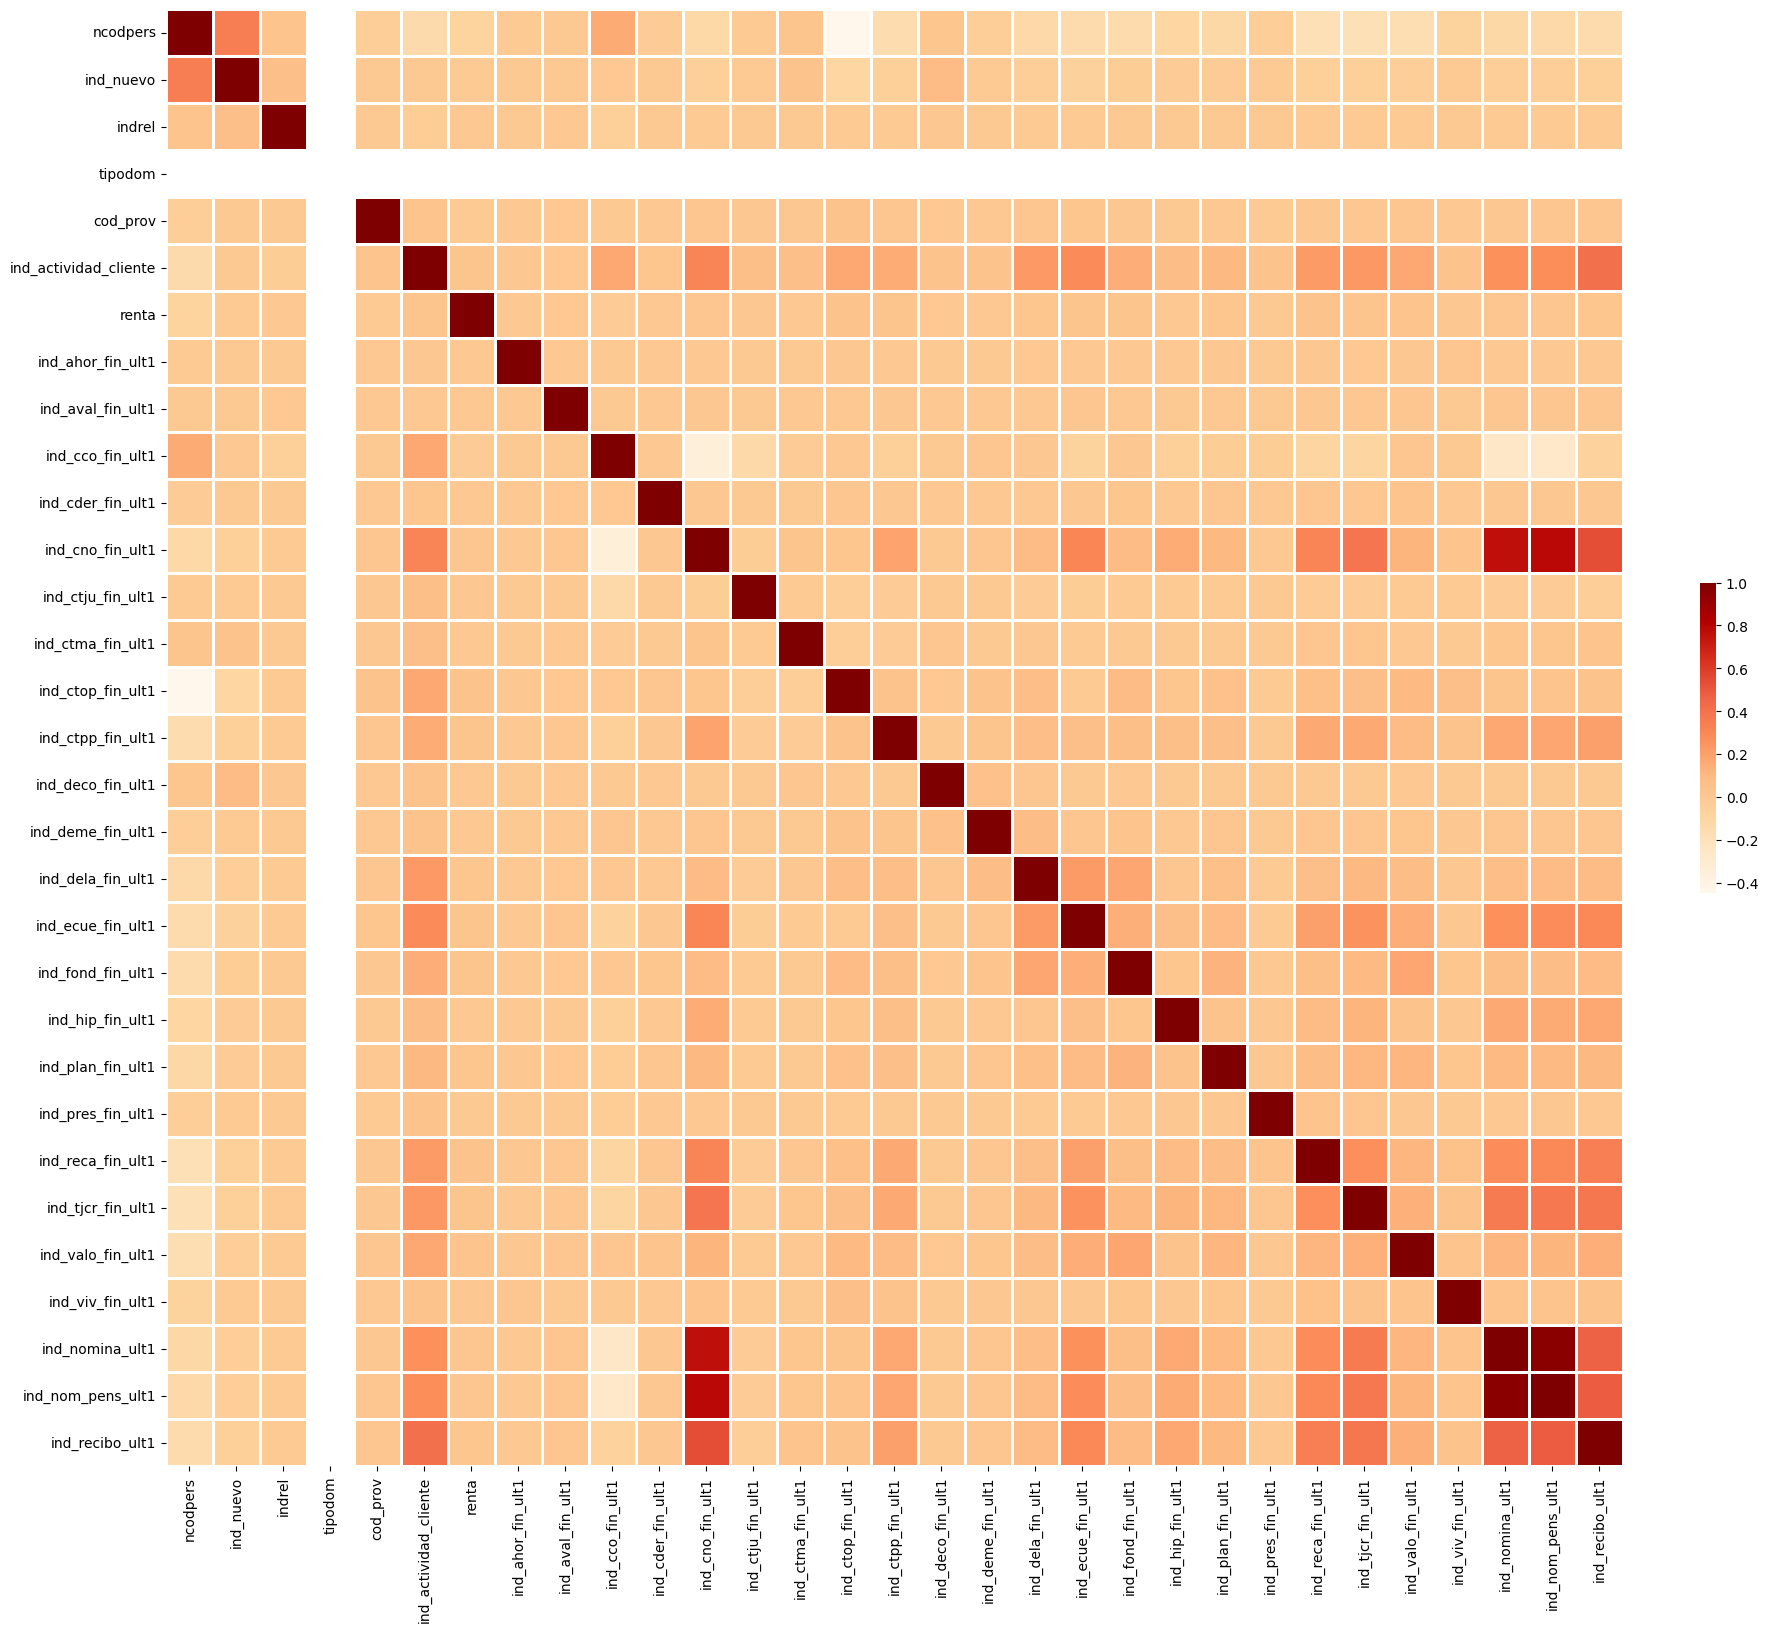

In [19]:
# calculate correlation matrix
#cols = ["customer_code", "employee_index", "sex", "age", "gross_income", "residence_index"]
corr = df1_train.corr()#plot the heatmap

# plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(
    corr, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)
#sns.heatmap(corr, xticklabels=cols, yticklabels=cols, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [20]:
df1.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


In [21]:
df1_train['sum']=0

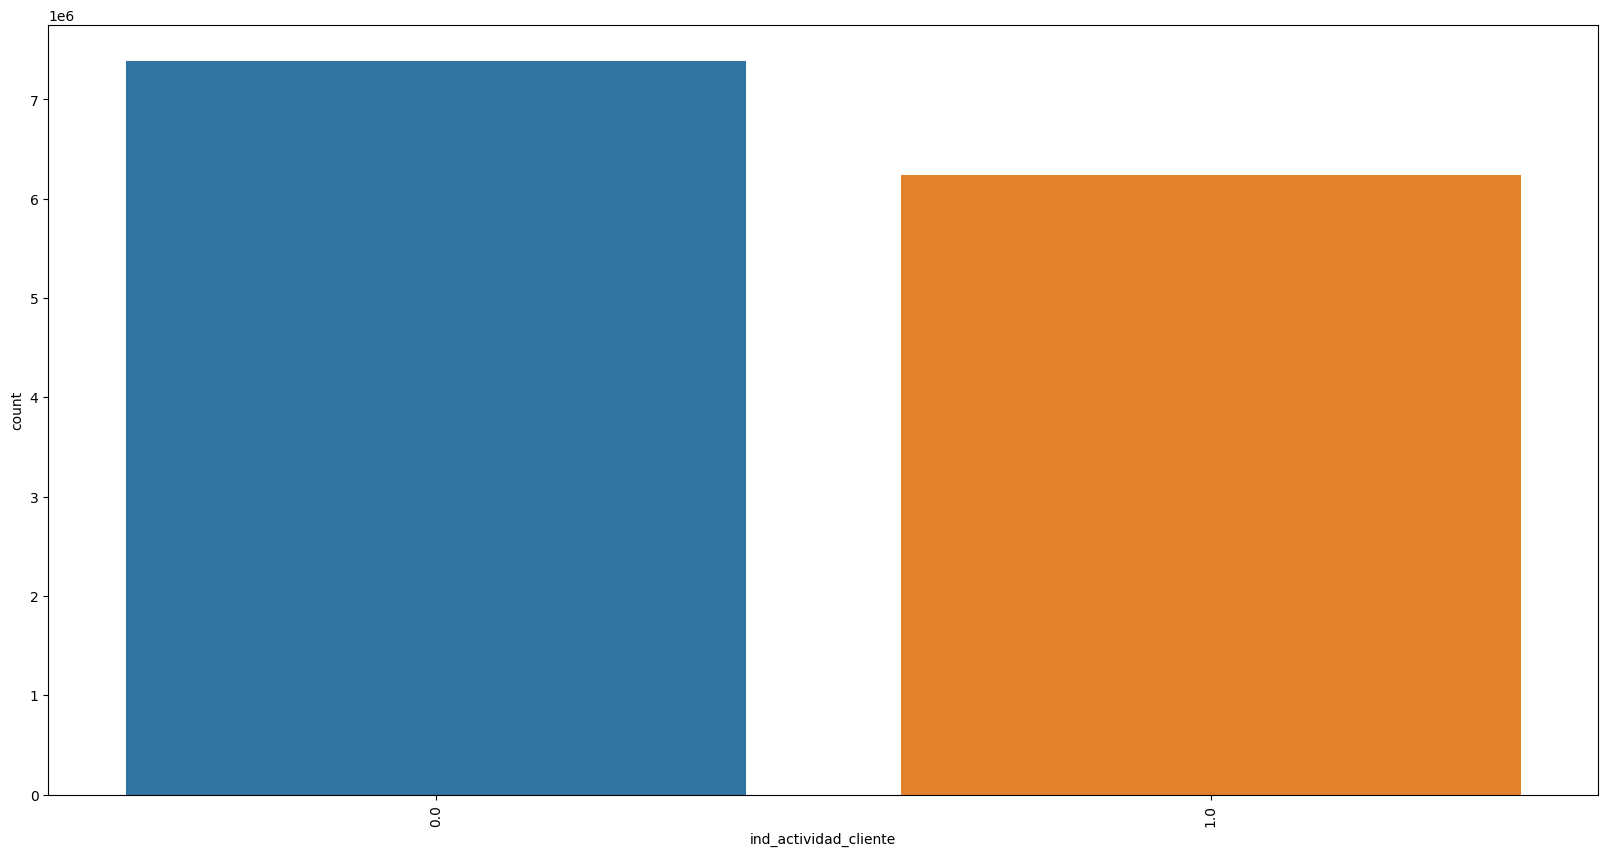

In [22]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'ind_actividad_cliente', data = df1_train)
plt.xticks(rotation = 90)
plt.show()

From the above graph we can infer that there are more number of inactive customers than active customers.

<AxesSubplot:>

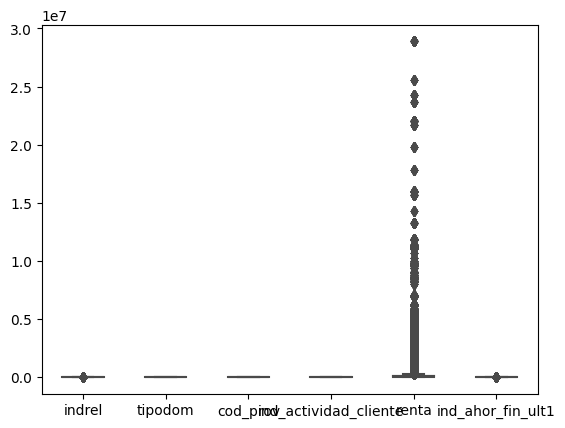

In [23]:
# Outlier
sns.boxplot(data = df1_train[['indrel', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1']], 
        palette= "rainbow", saturation=0.75, width=0.5, dodge=True, fliersize=5,linewidth = None, whis=1.5, ax=None)


We can see that there are outliers in the dataframe

In [24]:
#calculate mean value in train.csv
renta_mean = df1_train["renta"].mean()
print(renta_mean)

134254.31823814093


In [25]:
#If the customer has more than 2 bank product, it will be seeing as a cross selling customer.
df1_train.loc[df1_train["sum"] <= 1, "sum"] = 0
df1_train.loc[df1_train["sum"] > 1, "sum"] = 1

In [26]:
#calculate mean value in test.csv
renta_mean_test = df1_train["renta"].mean()
print(renta_mean_test)

134254.31823814093


In [27]:
#If the customer has more than 2 bank product, it will be seeing as a cross selling customer.
df1_train.loc[df1_train["sum"] <= 1, "sum"] = 0
df1_train.loc[df1_train["sum"] > 1, "sum"] = 1

In [28]:
#if income higher than mean value, mark it with 1 for high income. Otherwise mark it as 0.
#df1_train.loc[df1["renta"] <= renta_mean, "renta"] = 0
#df1.loc[df1["renta"] >= renta_mean, "renta"] = 1

#df1.loc[df1["renta"] <= renta_mean_test, "renta"] = 0
#df1.loc[df1["renta"] >= renta_mean_test, "renta"] = 1

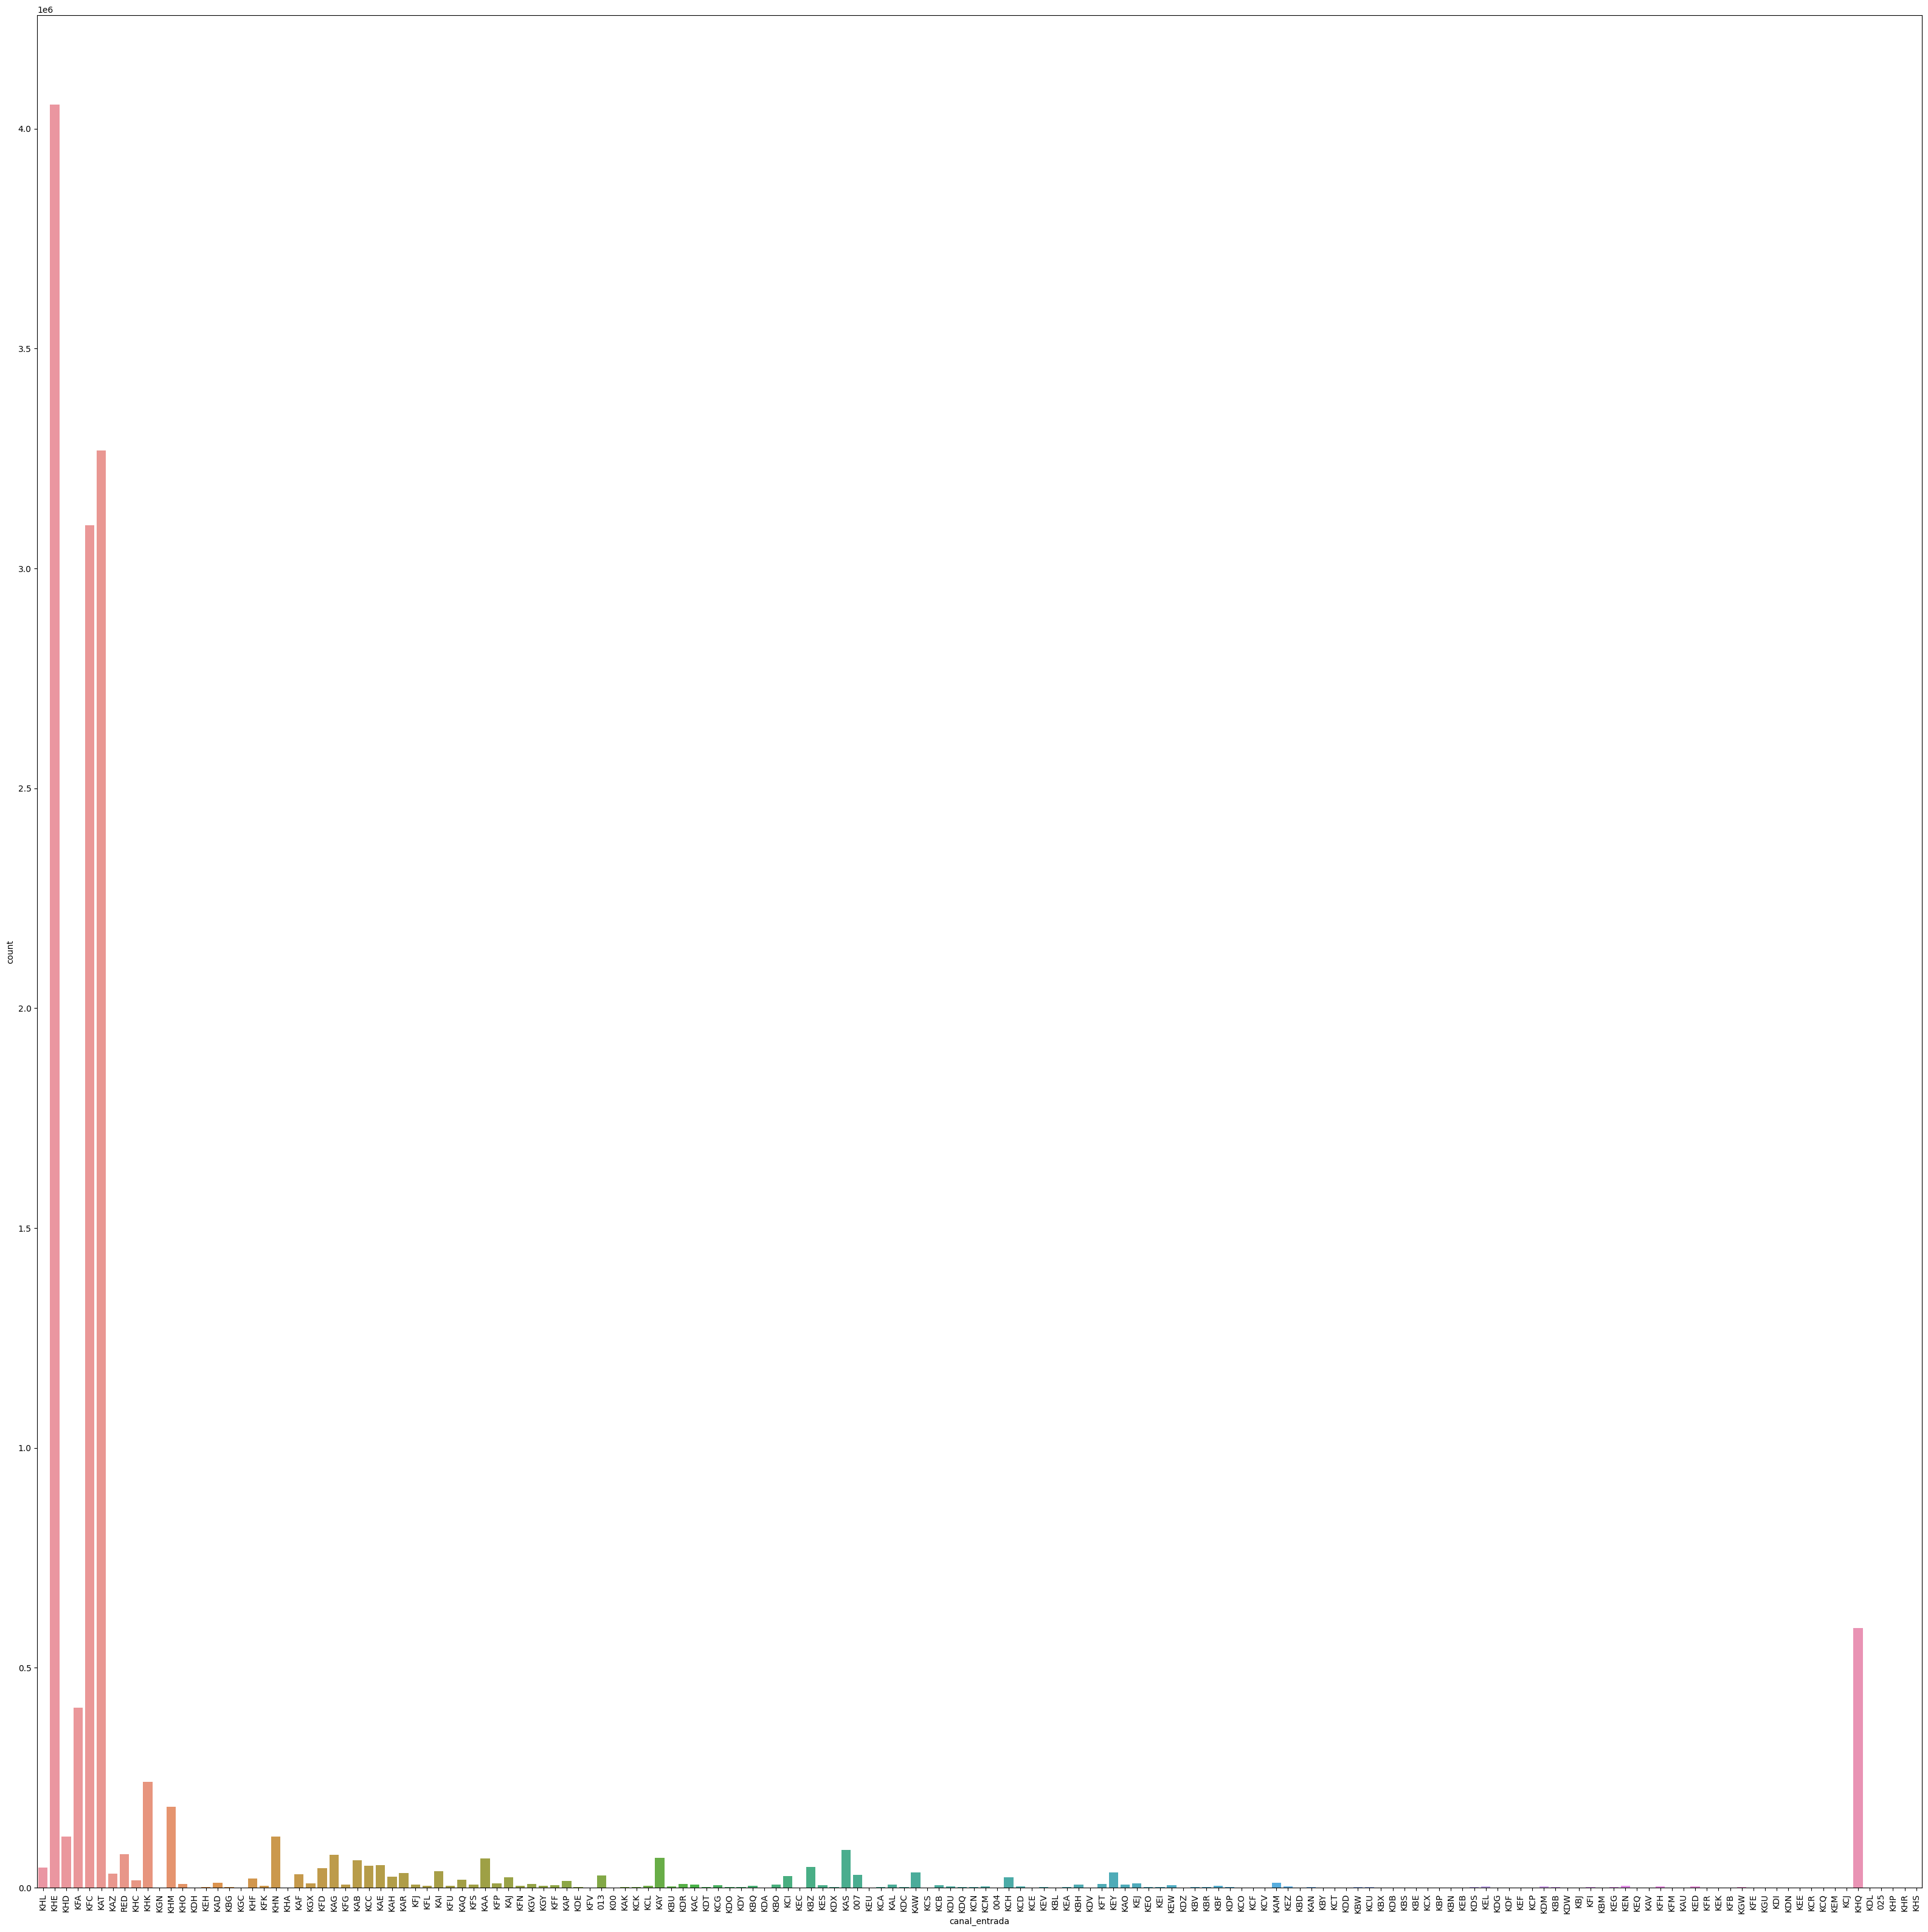

In [29]:
plt.figure(figsize=(40,40))
barplot = sns.countplot(x = 'canal_entrada' , data = df1_train)
plt.xticks(rotation = 90)
plt.show()


From the above graph we can infer that KHA,KFE,KFC were the most the frequently used channels by customers to join.

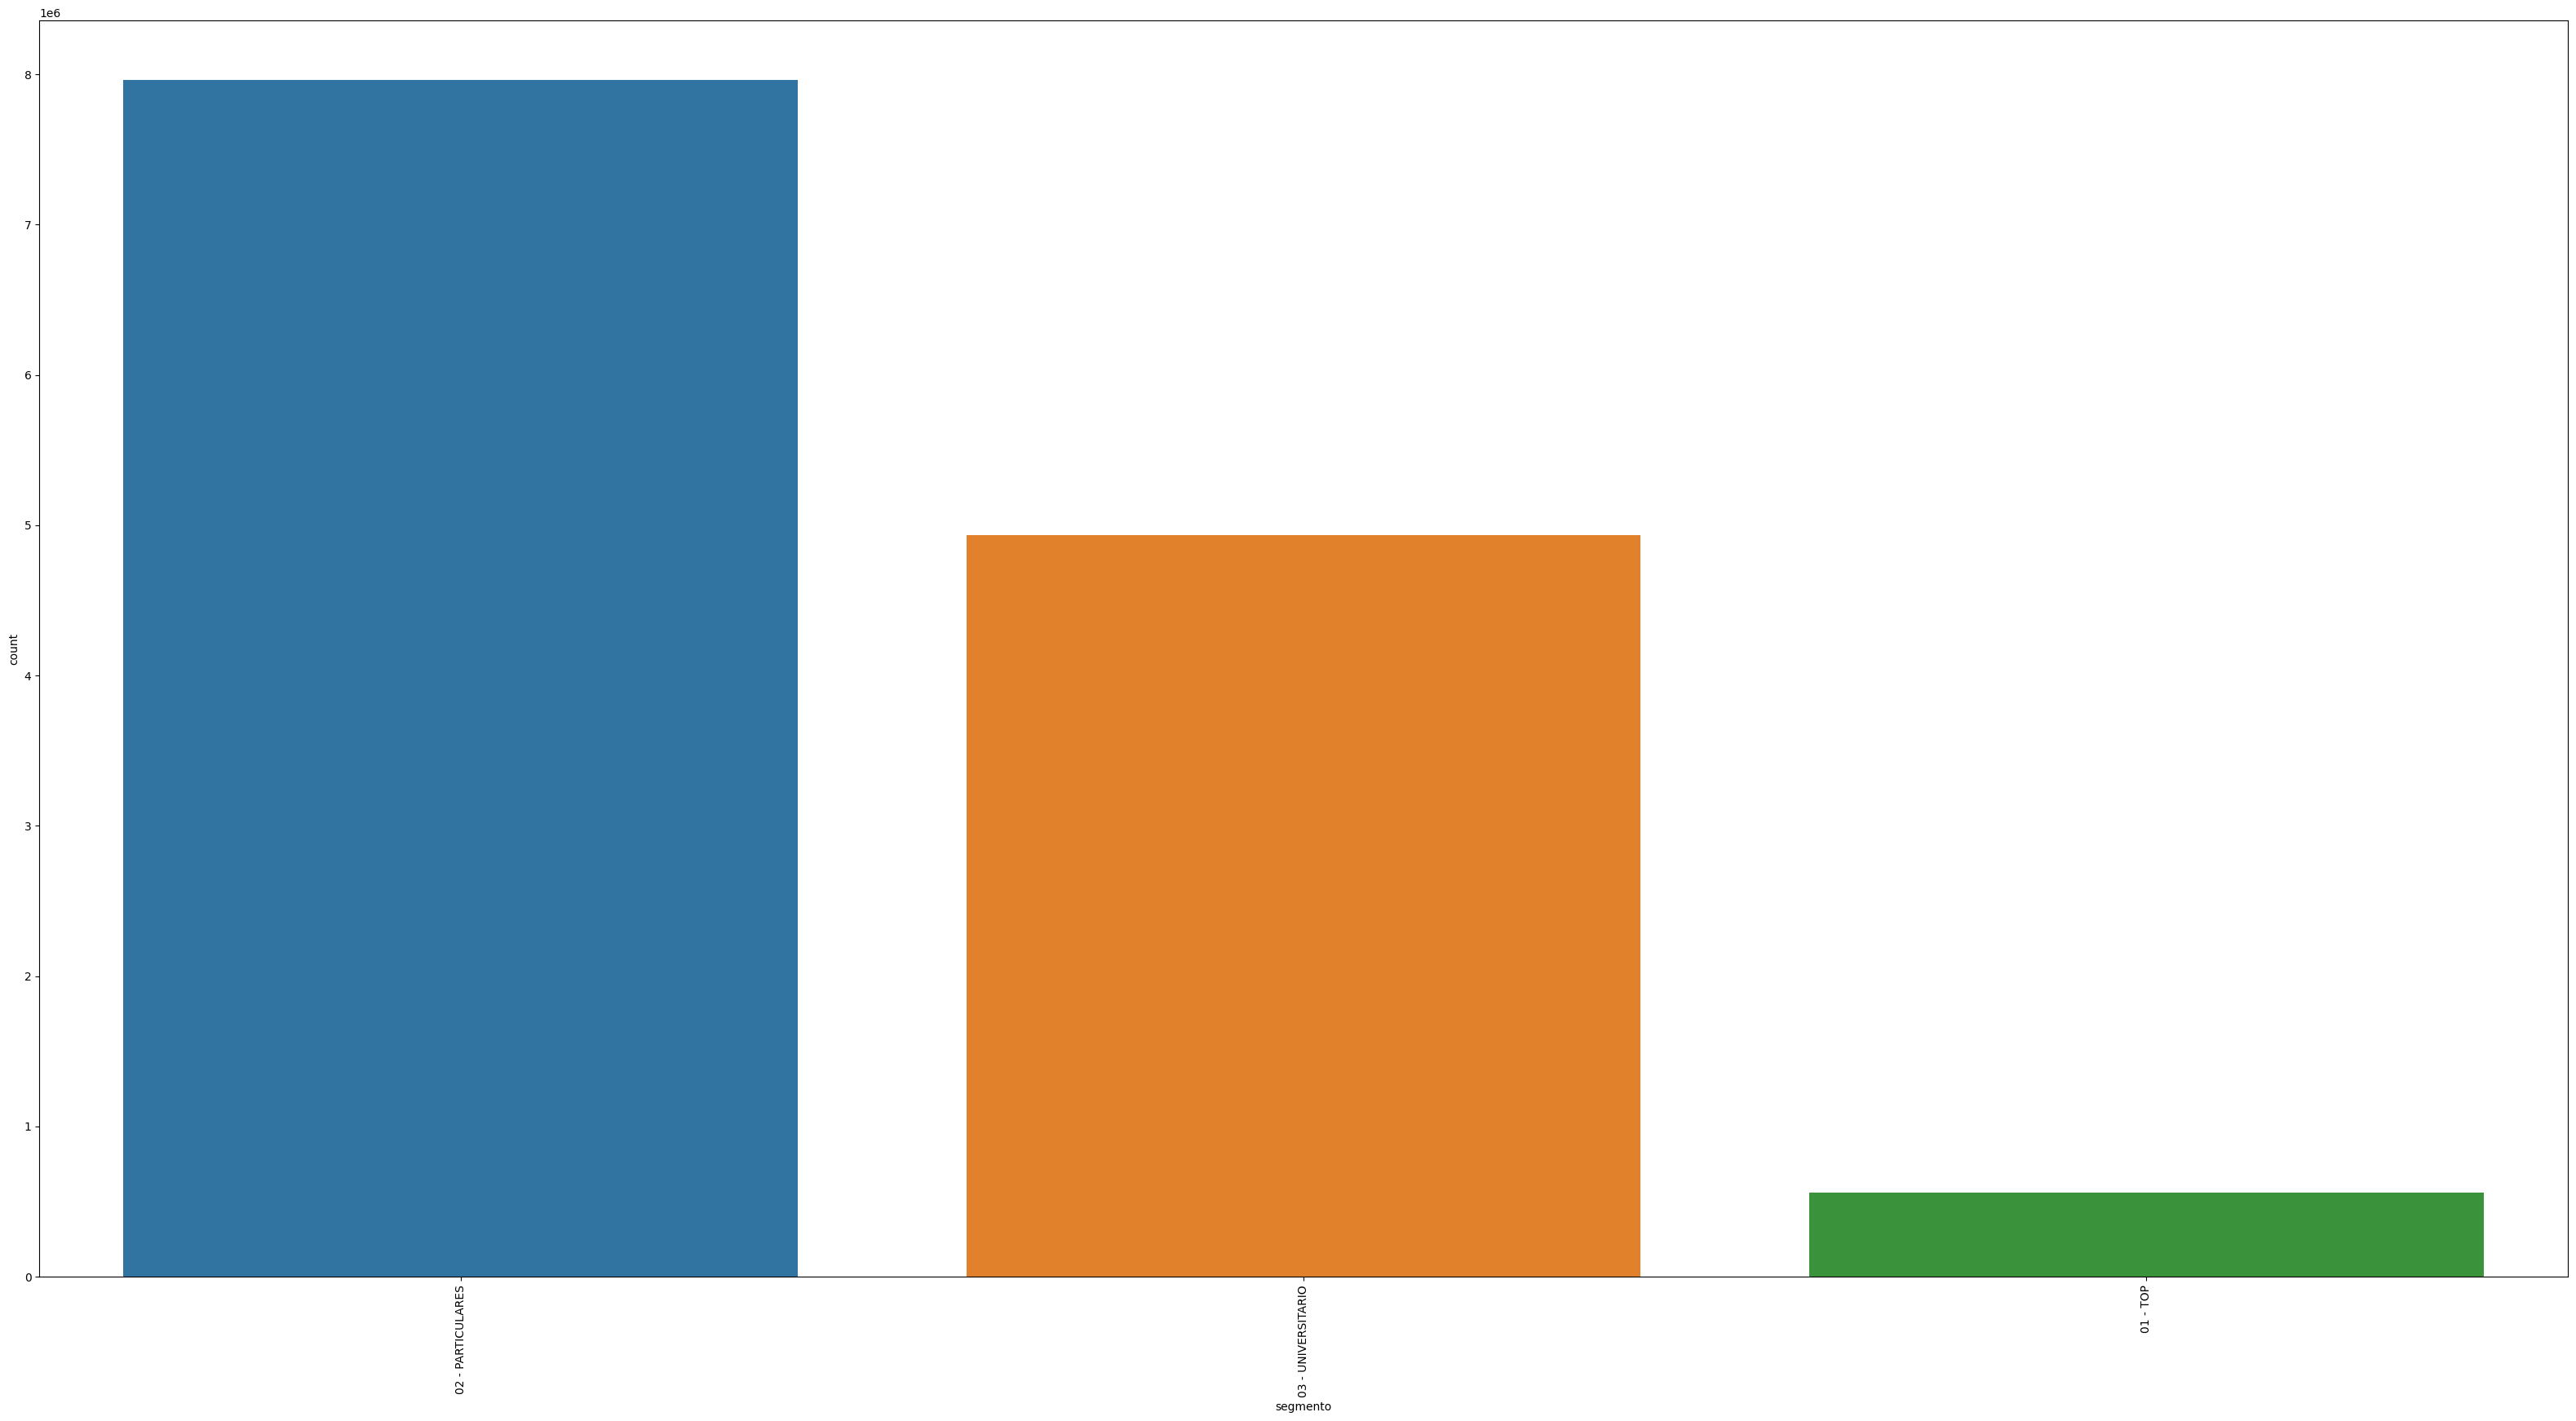

In [30]:
plt.figure(figsize=(40,20))
barplot = sns.countplot(x = 'segmento' , data = df1_train)
plt.xticks(rotation = 90)
plt.show()

The above graph infers that there are more number of customers in individual 'Particulares' segment .

<AxesSubplot:xlabel='sexo', ylabel='count'>

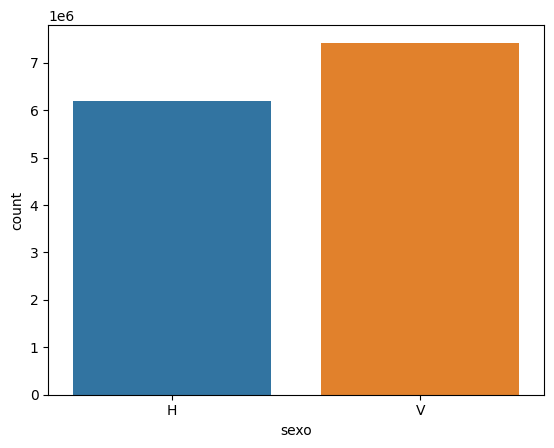

In [31]:
sns.countplot(x = 'sexo', data = df1_train)

The above graph we infer that there are more number of female customers

<AxesSubplot:xlabel='canal_entrada', ylabel='count'>

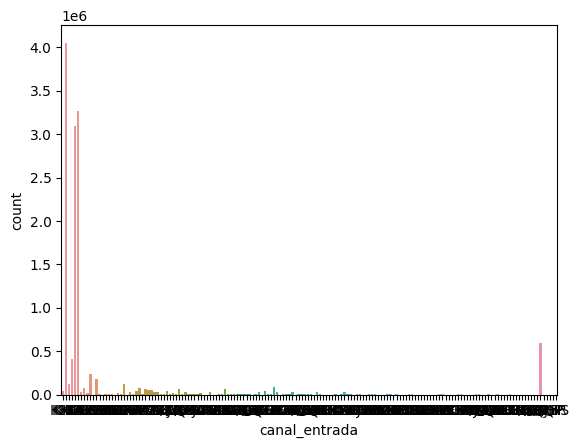

In [32]:
sns.countplot(x = 'canal_entrada', data = df1_train)

N0     10598474
YES     3048835
Name: multiple_accounts, dtype: int64

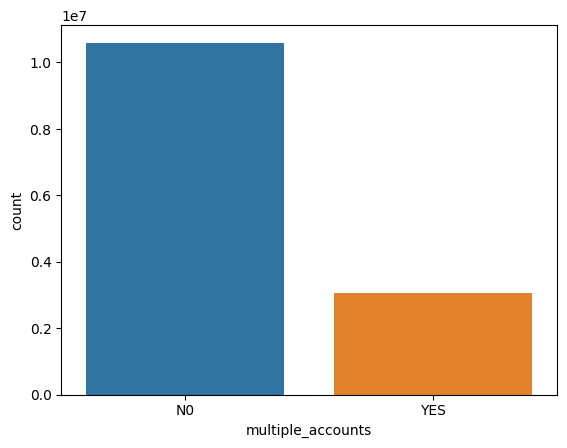

In [33]:
# How many customers have more than one account 
df1_train['multiple_accounts'] = ['YES' if x > 1 else 'N0' for x in np.sum(df1_train[['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_deme_fin_ult1','ind_dela_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_recibo_ult1']].values == 1, 1)]
sns.countplot(x = 'multiple_accounts', data = df1_train)
df1_train['multiple_accounts'].value_counts()

Final insights:

Based on the  Exploratory data analysis performed, the Data analysts at ABC company came up with the following recommendations to help the Credit union increase its cross-selling amongst its customers.

> More attention can be provided to customers who have single accounts.Address their needs and increase the number of products they require by knowing their needs.

> Design ads that properly help the customers understand the new product launched/services so that XYZ Credit union can reach their customers at a better reach.

> Provide complimentary gifts/services to its existing/new customers because it attracts existing customers and helps in networking.

> Go back and forth into the most frequently used channels to join by the customers and design ads/ provide new services


